## Geometries

A plot’s geometry dictates what visual elements will be used. In this chapter, we’ll familiarize you with the geometries used in the three most common plot types you’ll encounter - scatter plots, bar charts and line plots. We’ll look at a variety of different ways to construct these plots.

### Overplotting 1: large datasets

Scatter plots (using geom_point()) are intuitive, easily understood, and very common, but we must always consider overplotting, particularly in the following four situations:

Large datasets
Aligned values on a single axis
Low-precision data
Integer data
Typically, alpha blending (i.e. adding transparency) is recommended when using solid shapes. Alternatively, you can use opaque, hollow shapes.

Small points are suitable for large datasets with regions of high density (lots of overlapping).

Let's use the diamonds dataset to practice dealing with the large dataset case.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

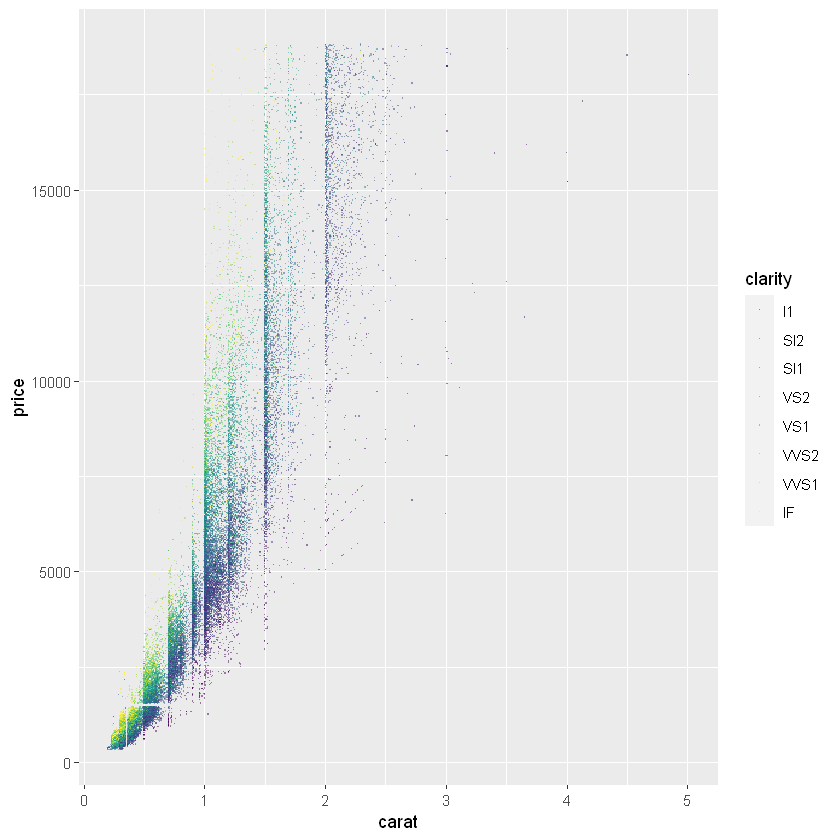

In [2]:
library(ggplot2)
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(diamonds, aes(carat, price, color = clarity))

# Add a point layer with tiny points
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, shape = ".") # , the point size of 1 pixel

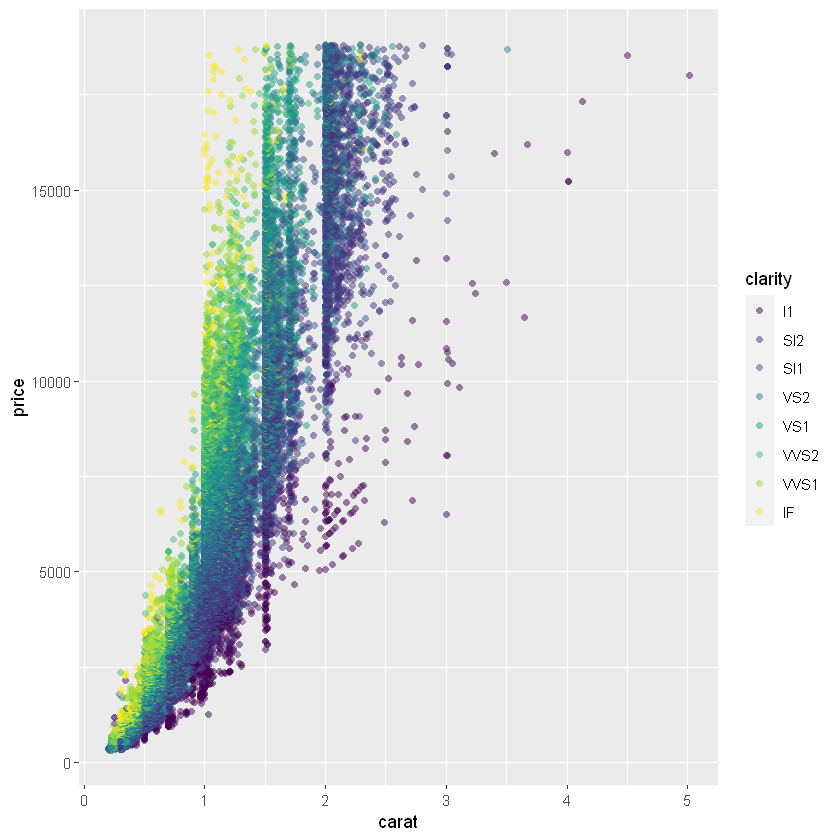

In [3]:
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(diamonds, aes(carat, price, color = clarity))

#  Update the point shape to remove the line outlines by setting shape to 16.
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, shape = 16)

### Overplotting 2: Aligned values

Let's take a look at another case where we should be aware of overplotting: Aligning values on a single axis.

This occurs when one axis is continuous and the other is categorical, which can be overcome with some form of jittering.

In the mtcars data set, fam and fcyl are categorical variants of cyl and am.

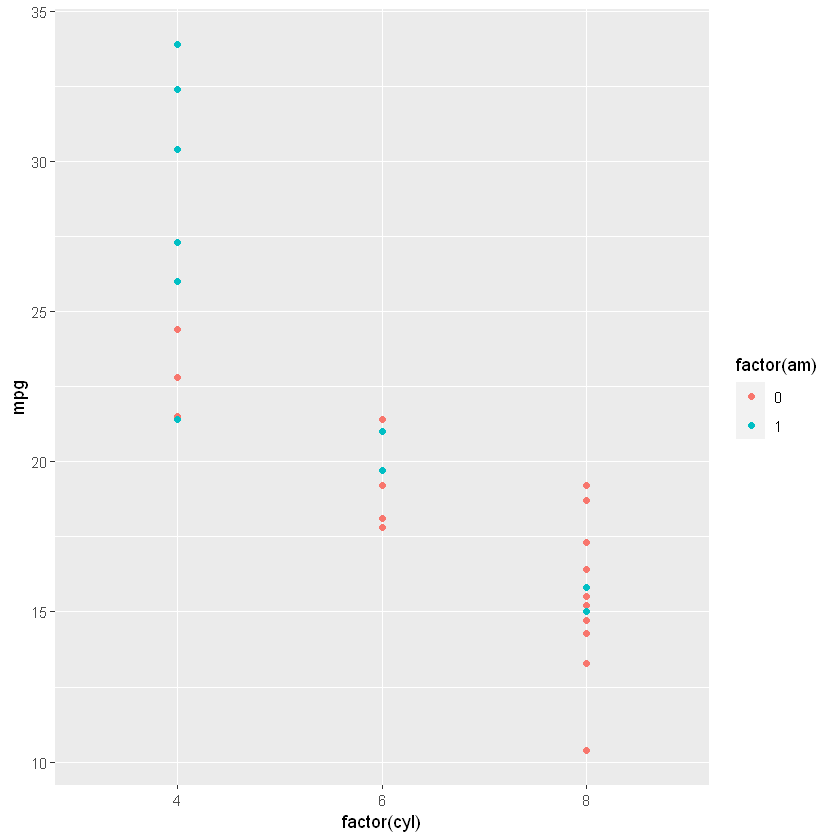

In [4]:
# Plot base
plt_mpg_vs_fcyl_by_fam <- ggplot(mtcars, aes(factor(cyl), mpg, color = factor(am)))

# Default points are shown for comparison
plt_mpg_vs_fcyl_by_fam + geom_point()

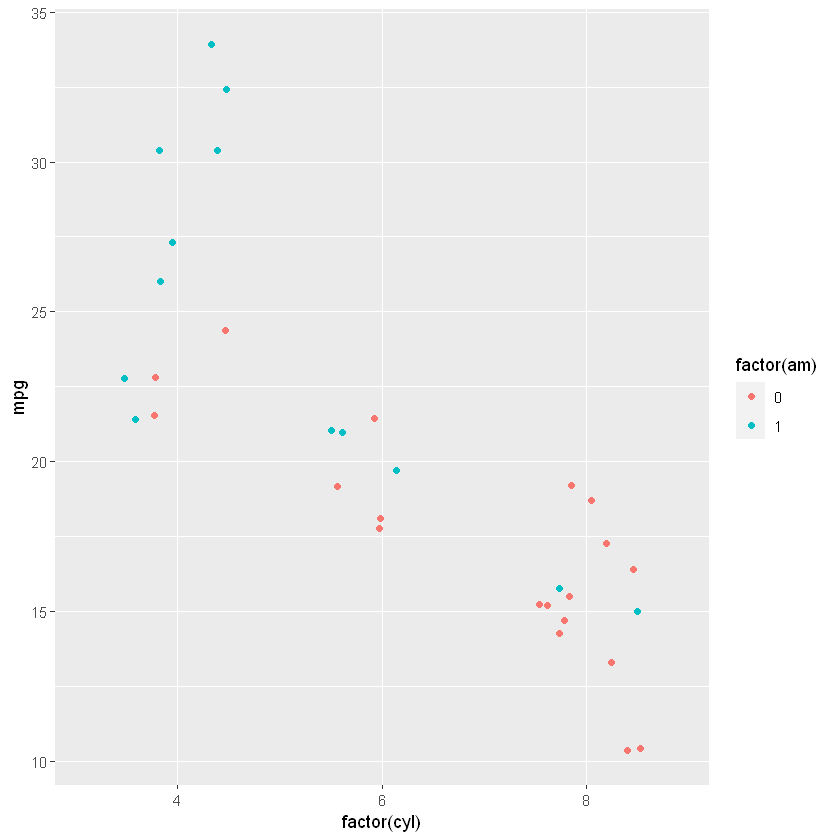

In [5]:
# Alter the point positions by jittering, width 0.3
plt_mpg_vs_fcyl_by_fam + geom_point(position = position_jitter(width = 0.3))

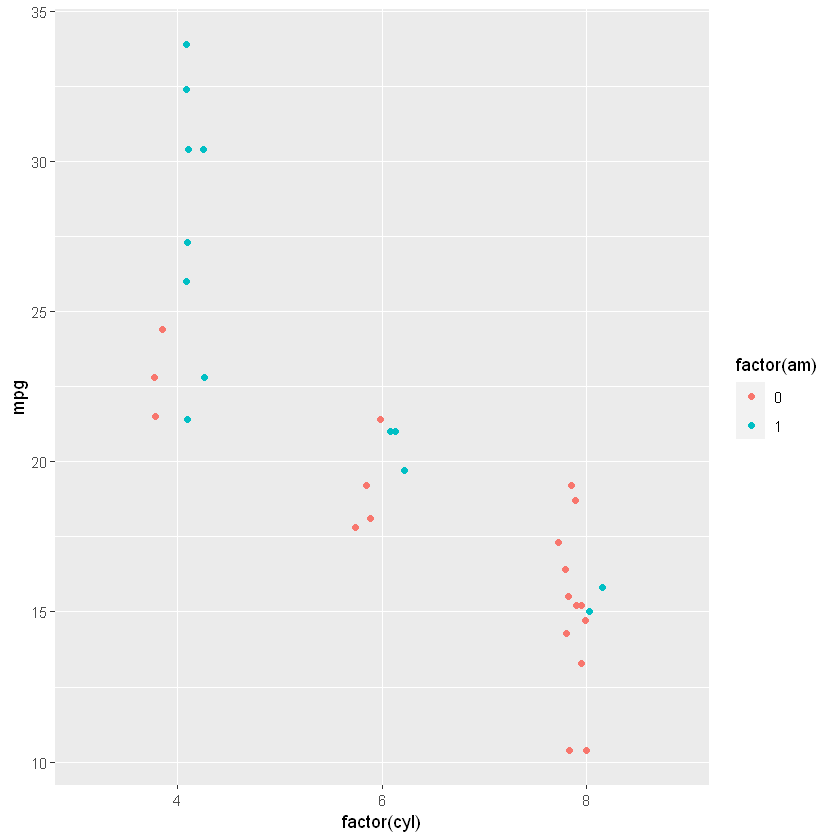

In [6]:
# Now jitter and dodge the point positions
plt_mpg_vs_fcyl_by_fam + geom_point(position = position_jitterdodge(jitter.width = 0.3, dodge.width = 0.3)) 
#separate subgroups further.

### Overplotting 3: Low-precision data

You already saw how to deal with overplotting when using geom_point() in two cases:

1. Large datasets

2. Aligned values on a single axis

We used position = 'jitter' inside geom_point() or geom_jitter().

Let's take a look at another case:

Low-precision data

This results from low-resolution measurements like in the iris dataset, which is measured to 1mm precision (see viewer). It's similar to case 2, but in this case we can jitter on both the x and y axis.

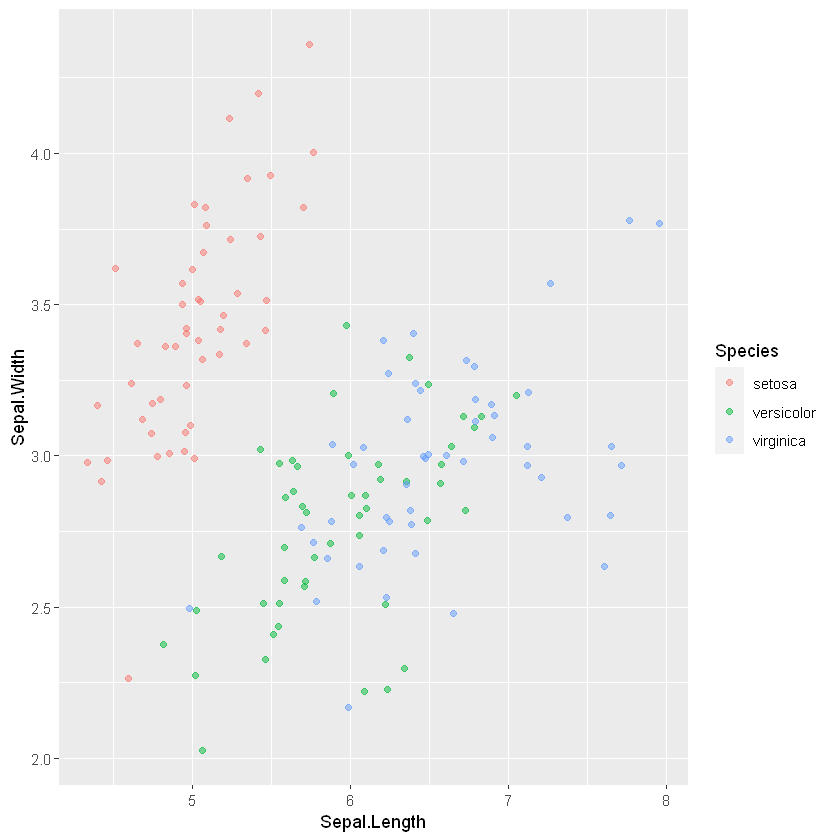

In [8]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.1
  geom_jitter(width = 0.1, alpha = 0.5)

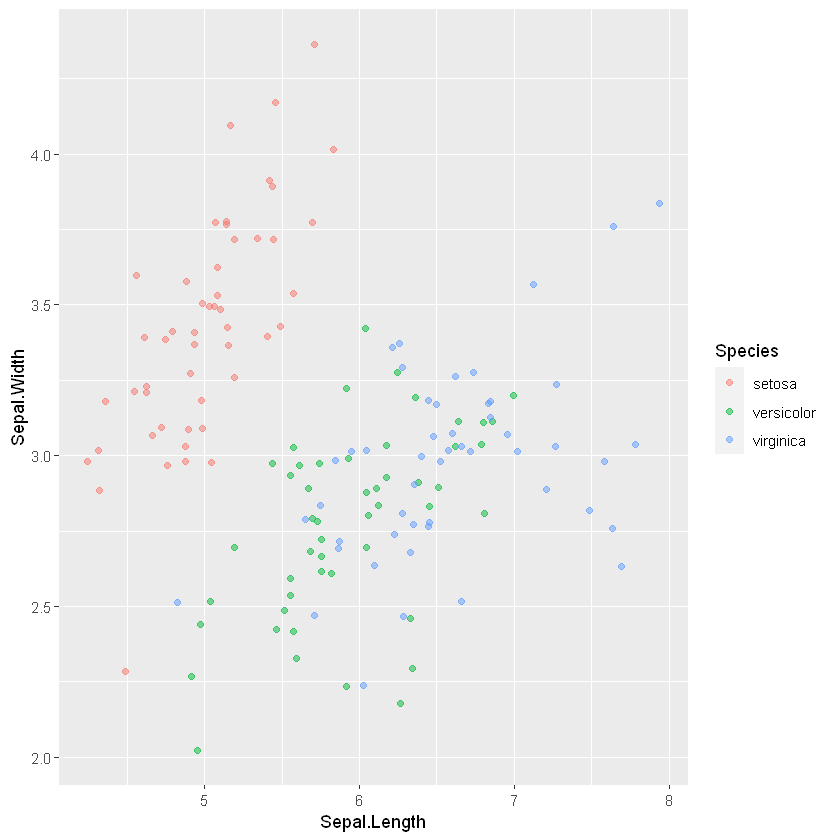

In [9]:
# also ...
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Use a jitter position function with width 0.1
  geom_point(position = position_jitter(width = 0.1), alpha = 0.5)

### Drawing histograms
Recall that histograms cut up a continuous variable into discrete bins and, by default, maps the internally calculated count variable (the number of observations in each bin) onto the y aesthetic. An internal variable called density can be accessed by using the .. notation, i.e. ..density... Plotting this variable will show the relative frequency, which is the height times the width of each bin.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


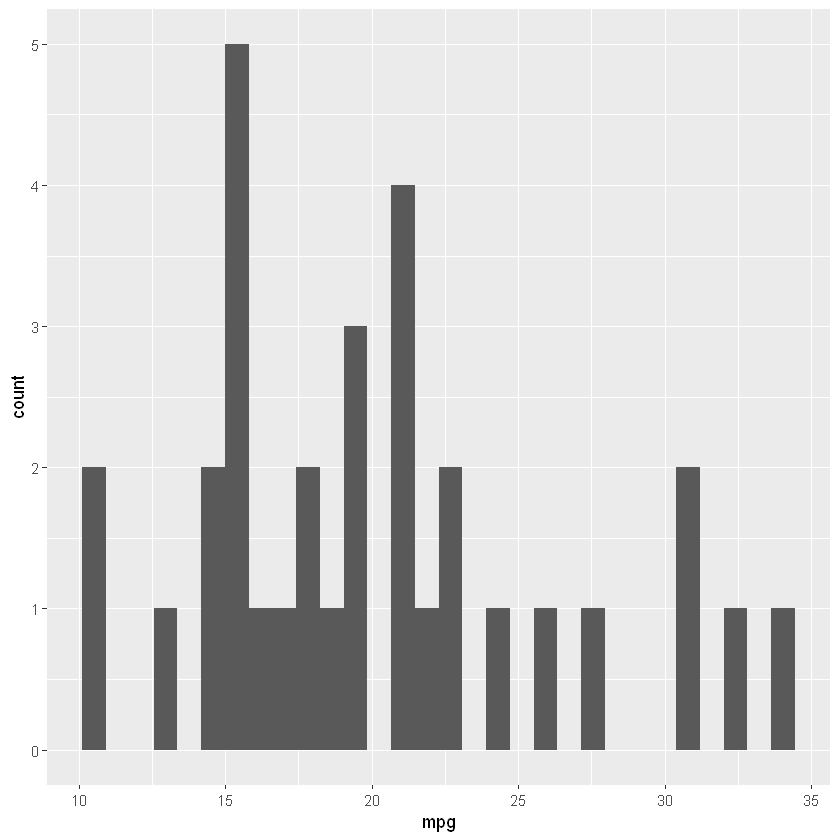

In [11]:
# Plot mpg
ggplot(mtcars,aes(mpg)) +
  # Add a histogram layer
  geom_histogram()

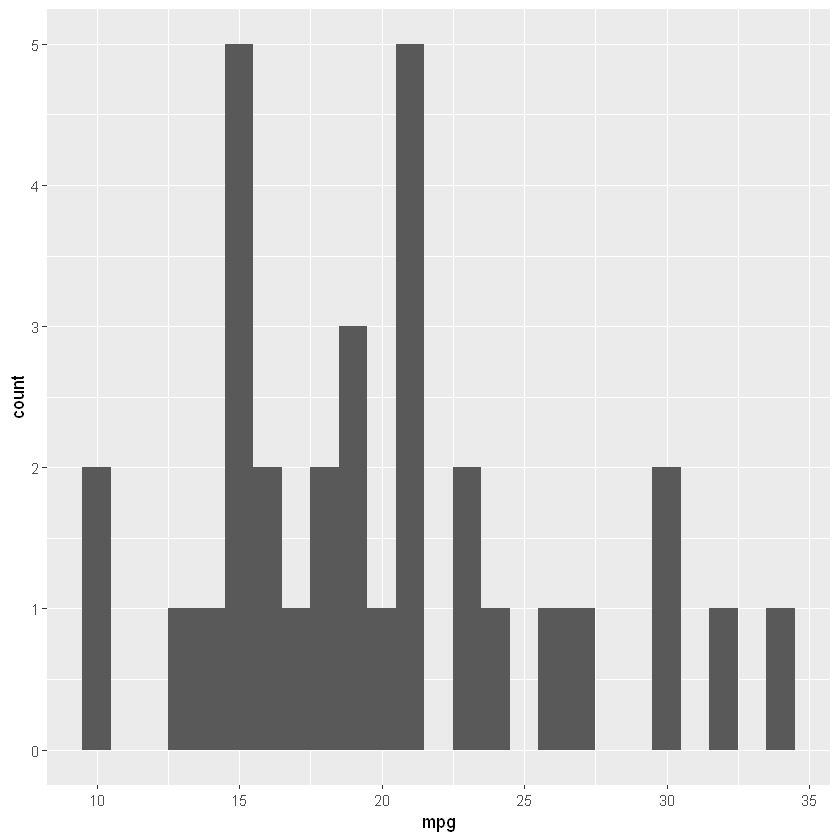

In [12]:
ggplot(mtcars, aes(mpg)) +
  # Set the binwidth to 1
  geom_histogram(binwidth = 1)

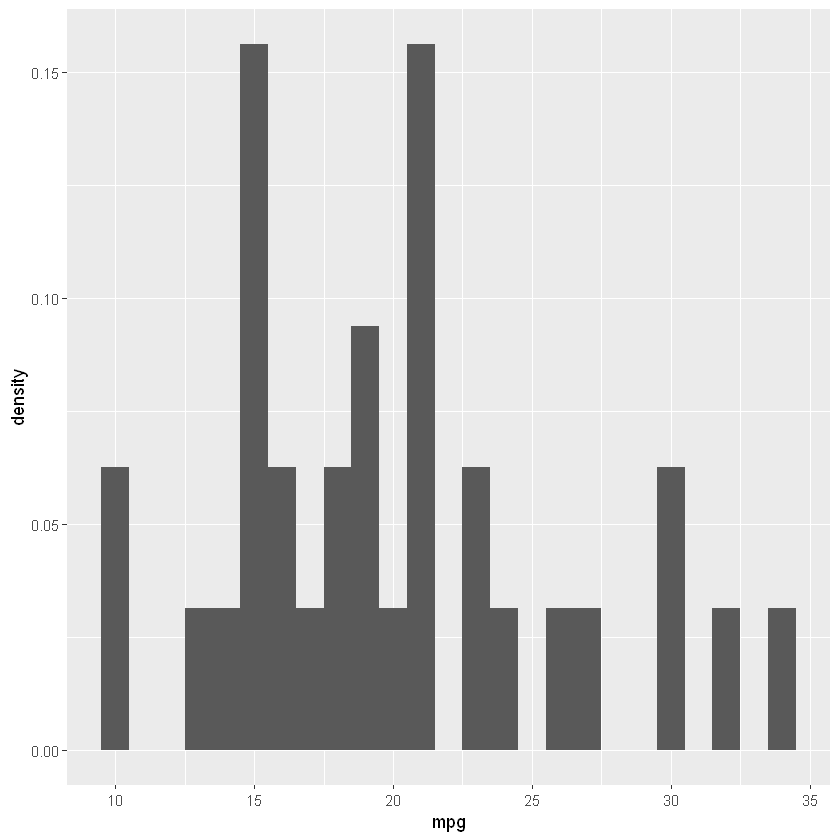

In [14]:
# Map y to ..density..
ggplot(mtcars, aes(mpg, ..density..)) +
  geom_histogram(binwidth = 1)

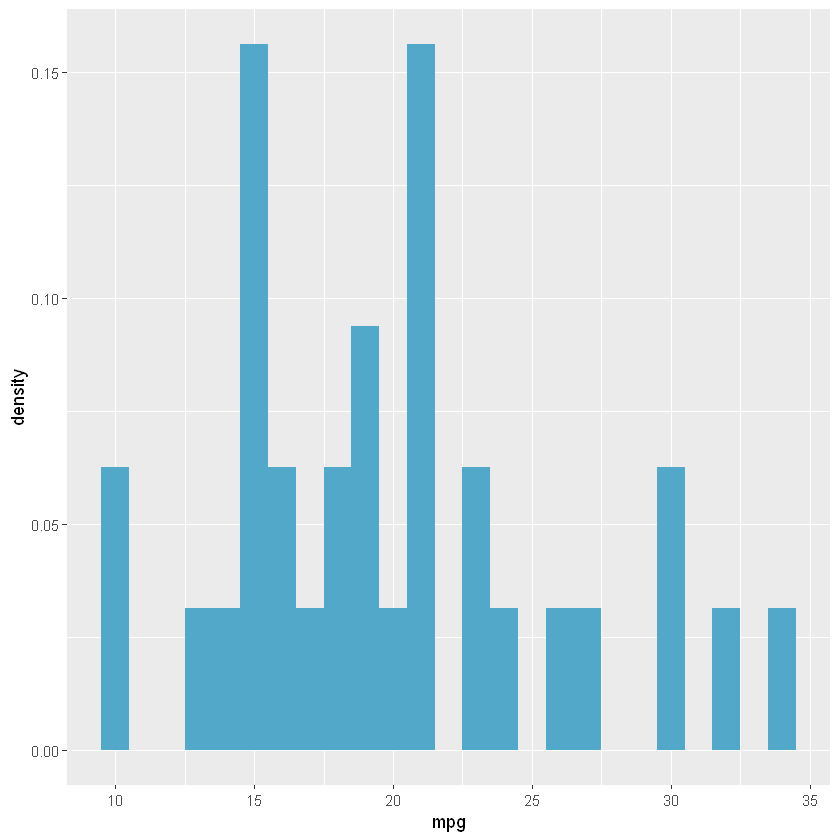

In [15]:
datacamp_light_blue <- "#51A8C9"

ggplot(mtcars, aes(mpg, ..density..)) +
  # Set the fill color to datacamp_light_blue
  geom_histogram(binwidth = 1, fill = datacamp_light_blue)

### Positions in histograms
Here, we'll examine the various ways of applying positions to histograms. geom_histogram(), a special case of geom_bar(), has a position argument that can take on the following values:

stack (the default): Bars for different groups are stacked on top of each other.

dodge: Bars for different groups are placed side by side.

fill: Bars for different groups are shown as proportions.

identity: Plot the values as they appear in the dataset.

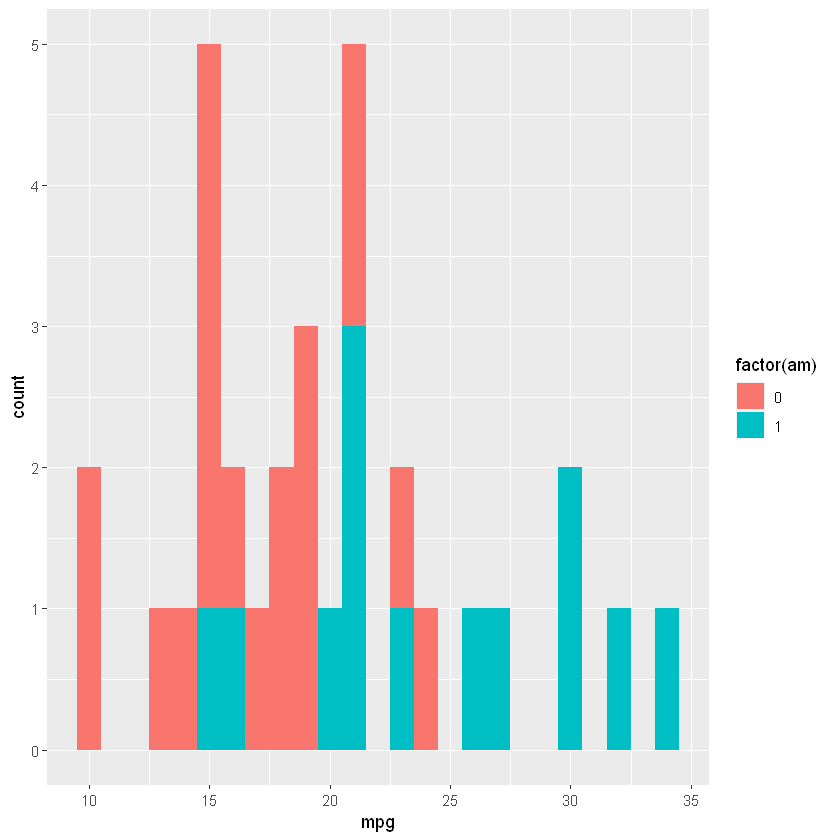

In [17]:
# Update the aesthetics so the fill color is by fam
ggplot(mtcars, aes(mpg, fill = factor(am))) +
  geom_histogram(binwidth = 1)

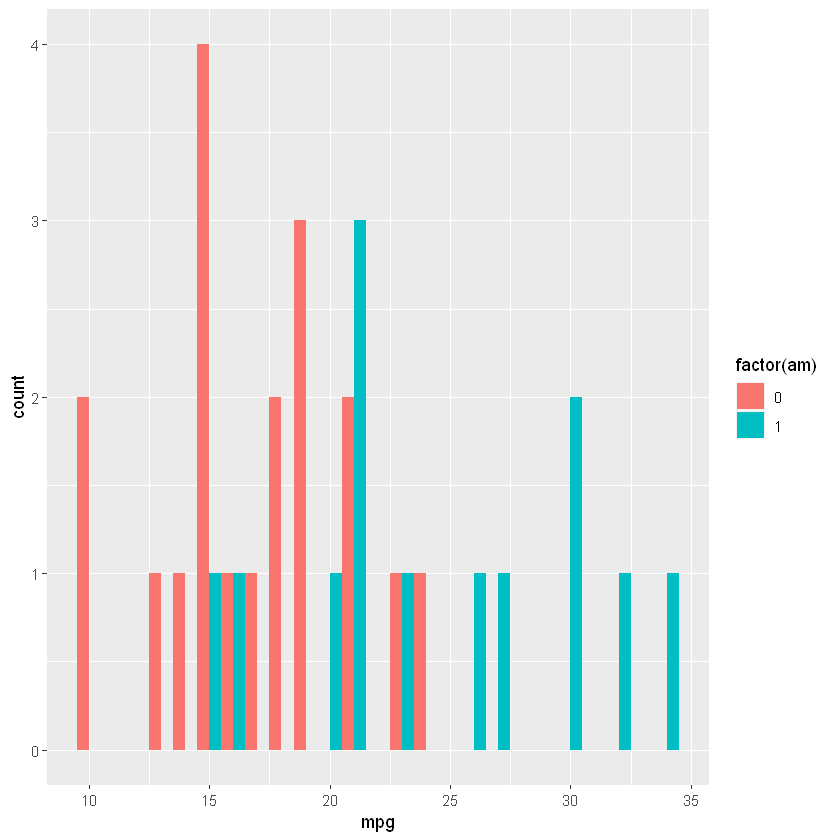

In [19]:
ggplot(mtcars, aes(mpg, fill = factor(am))) +
  # Change the position to dodge
  geom_histogram(binwidth = 1, position = "dodge") # Update the histogram layer to position the bars side-by-side

Warning message:
"Removed 16 rows containing missing values (geom_bar)."

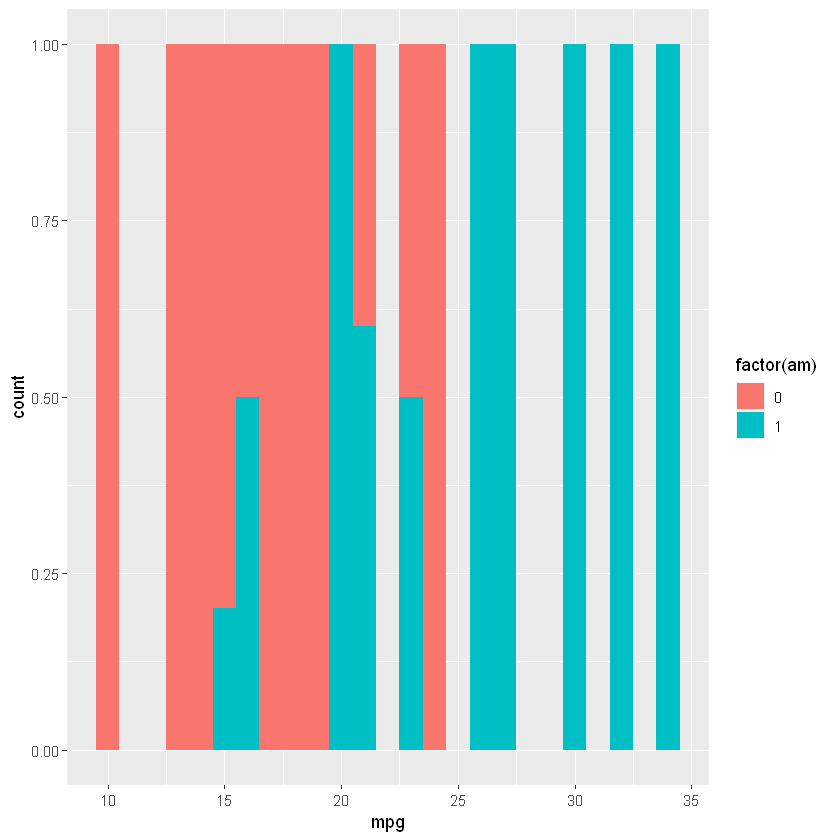

In [21]:
ggplot(mtcars, aes(mpg, fill = factor(am))) +
  # Change the position to fill
  geom_histogram(binwidth = 1, position = "fill")

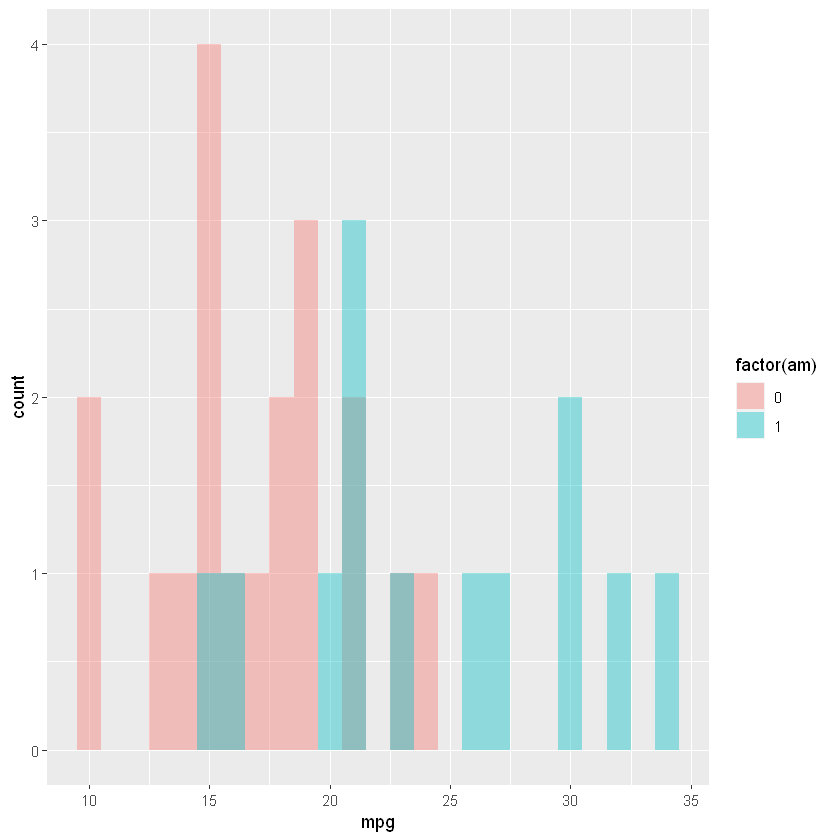

In [23]:
ggplot(mtcars, aes(mpg, fill = factor(am))) +
  # Change the position to identity, with transparency 0.4
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.4) # histogram layer so bars are top of each other,

### Position in bar and col plots
Let's see how the position argument changes geom_bar().

We have three position options:

stack: The default

dodge: Preferred

fill: To show proportions

While we will be using geom_bar() here, note that the function geom_col() is just geom_bar() where both the position and stat arguments are set to "identity". It is used when we want the heights of the bars to represent the exact values in the data.

In this exercise, you'll draw the total count of cars having a given number of cylinders (fcyl), according to manual or automatic transmission type (fam).

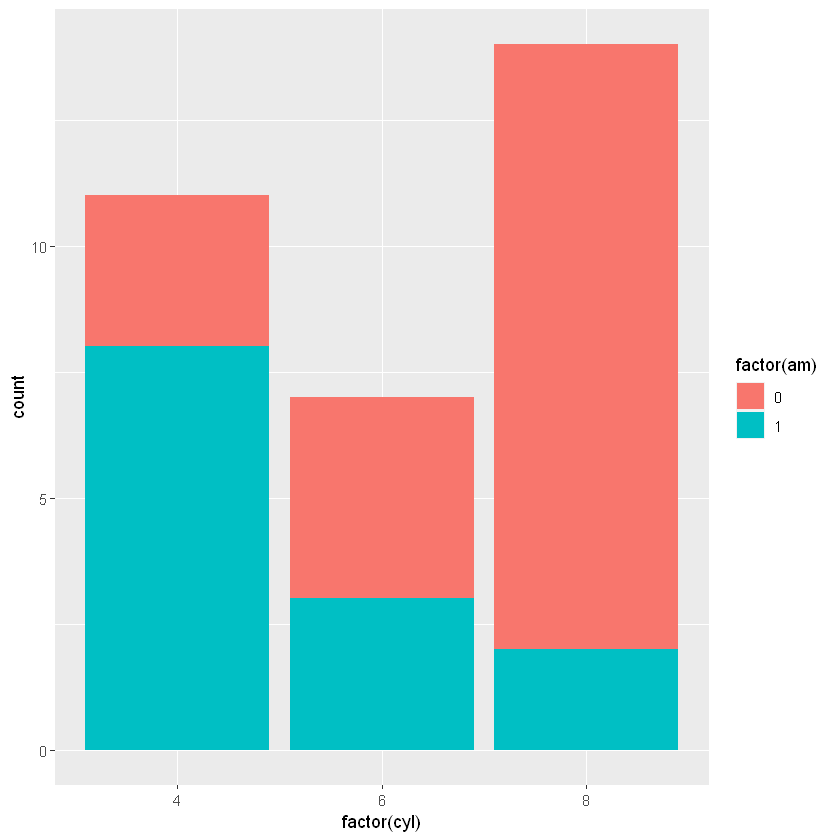

In [27]:
# Plot fcyl, filled by fam
ggplot(mtcars,aes(factor(cyl), fill = factor(am))) +
  # Add a bar layer
  geom_bar()

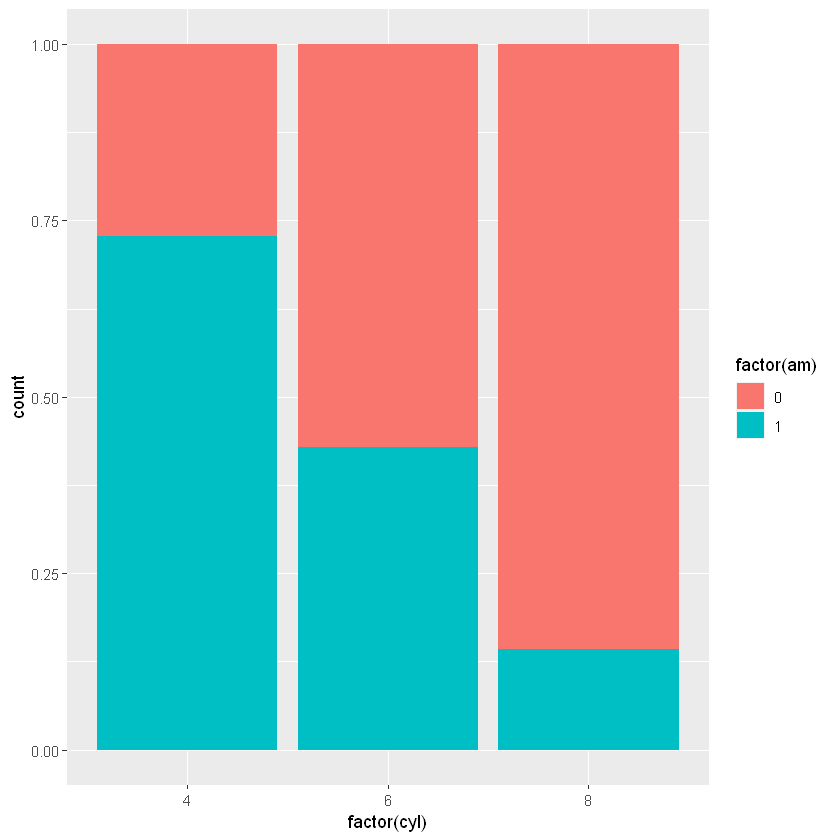

In [29]:
ggplot(mtcars,aes(factor(cyl), fill = factor(am))) +
  # Set the position to "fill"
  geom_bar(position = "fill")

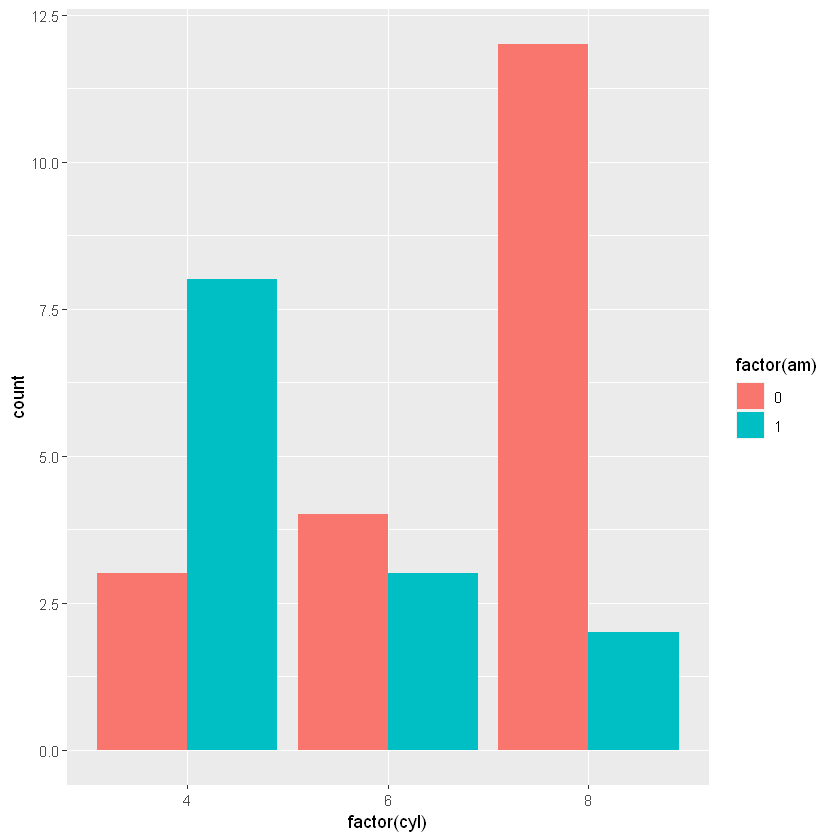

In [31]:
ggplot(mtcars,aes(factor(cyl), fill = factor(am))) +
  # Set the position to "fill"
  geom_bar(position = "dodge")

### Overlapping bar plots
You can customize bar plots further by adjusting the dodging so that your bars partially overlap each other. Instead of using position = "dodge", you're going to use position_dodge(), like you did with position_jitter() in the the previous exercises. Here, you'll save this as an object, posn_d, so that you can easily reuse it.

Remember, the reason you want to use position_dodge() (and position_jitter()) is to specify how much dodging (or jittering) you want.

For this example, you'll use the mtcars dataset.

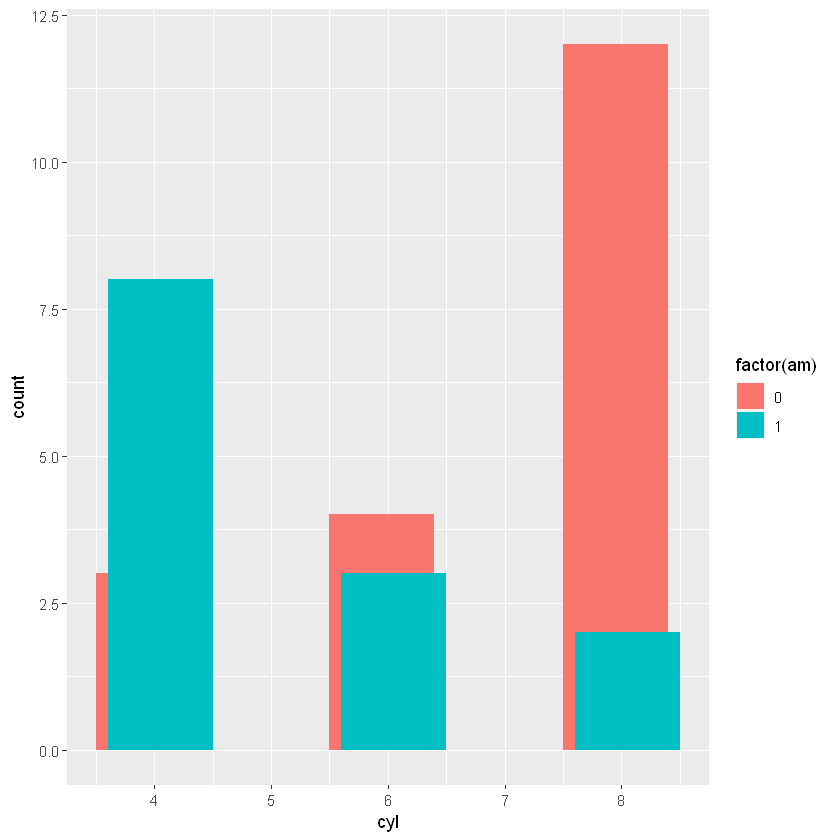

In [32]:
ggplot(mtcars, aes(cyl, fill = factor(am))) +
  # Change position to use the functional form, with width 0.2
  geom_bar(position = position_dodge(width = 0.2))

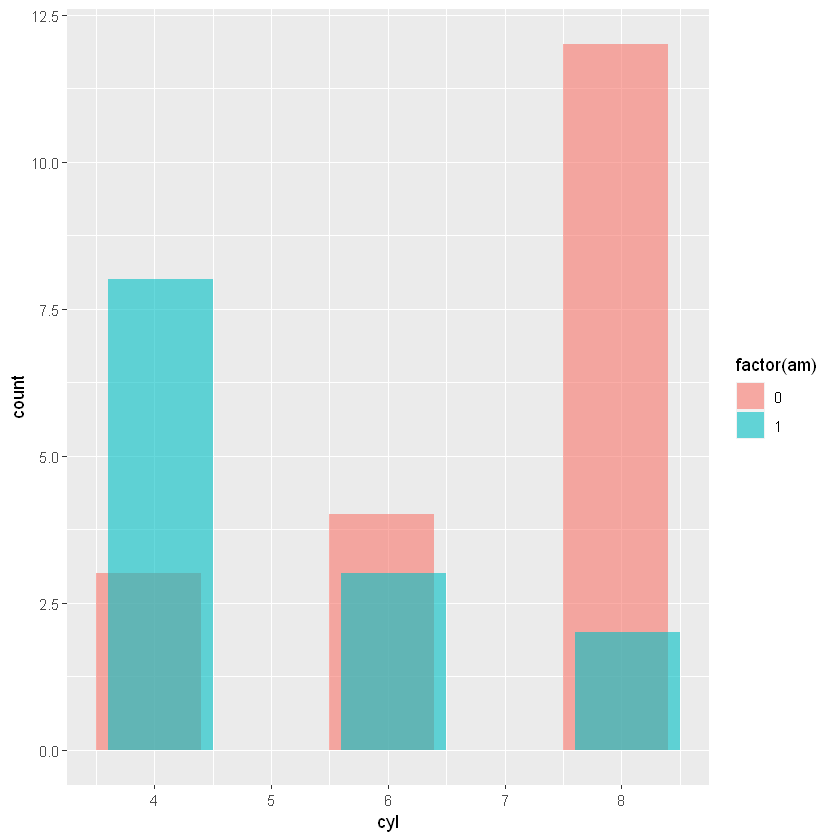

In [34]:
ggplot(mtcars, aes(cyl, fill = factor(am))) +
  # Set the transparency to 0.6
  geom_bar(position = position_dodge(width = 0.2), alpha = 0.6)

### Bar plots: sequential color palette
In this bar plot, we'll fill each segment according to an ordinal variable. The best way to do that is with a sequential color palette.

Here's an example of using a sequential color palette with the mtcars dataset:

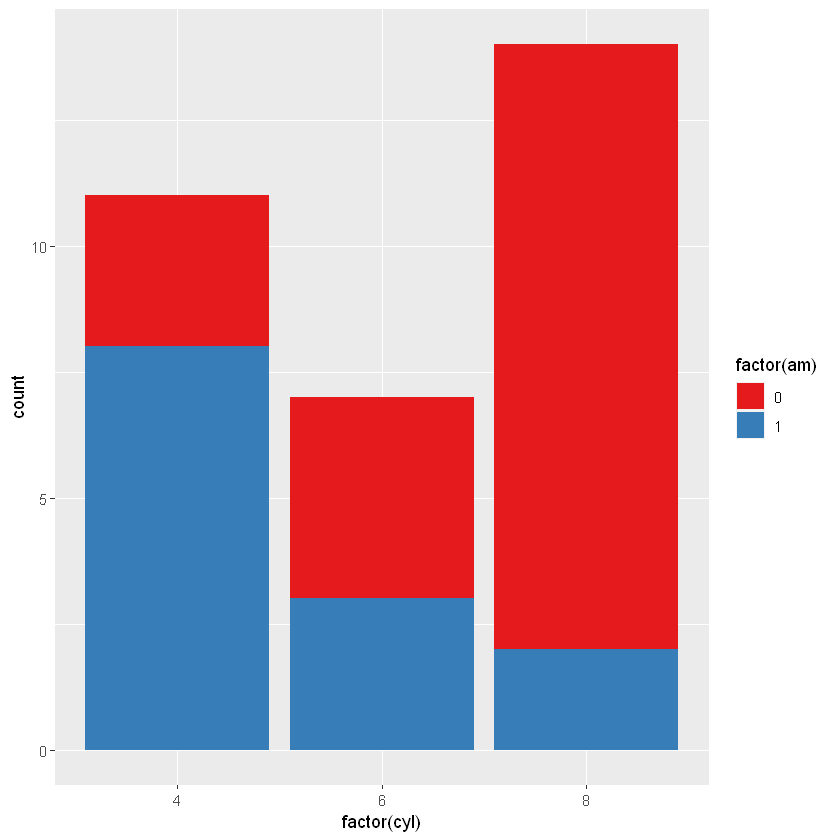

In [38]:
ggplot(mtcars, aes(factor(cyl), fill = factor(am)))+
  geom_bar() +
  scale_fill_brewer(palette = "Set1")